# Q1: Regression Decision Tree Construction

### Group Members: Pranav Mehrotra (20CS10085) and Saransh Sharma (20CS30065)

#### Import Required Libraries. To install Seaborn type in command pip install seaborn in the terminal. 
#### To run a cell press ctr + enter and press shift + enter to run a cell and move to next cell

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the CSV file in the from of a dataframe


In [2]:
data = pd.read_csv("Train_B_Tree.csv")

#### Primary Analysis of the data read. 

In [3]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape

(1030, 9)

#### Check for duplicate data. Duplicate data doesn't help in training and so needs to be dropped.

In [5]:
data[data.duplicated()==True]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [6]:
data = data.drop_duplicates(keep='first')

In [7]:
data.shape

(1005, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   slag              1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseaggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   csMPa             1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [9]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
data.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [11]:
data.shape

(1005, 9)

#### Feature Matrix of the data

In [12]:
X = data.drop(['csMPa'],axis=1)
X.shape

(1005, 8)

#### Output Vector of the data

In [13]:
y = data.csMPa
y.shape

(1005,)

#### To visualise the kernel density (peaks in the data) of the individual features and to visualise the distributions' median, 25 percentile and 75 percentile quartiles

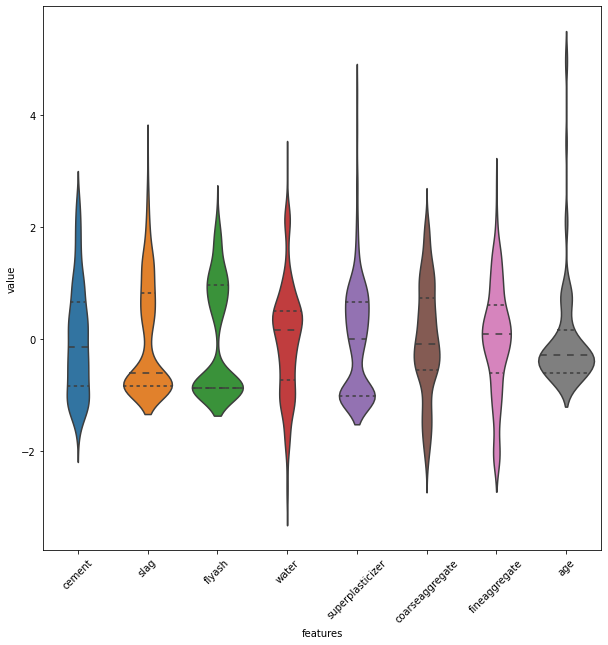

In [14]:
data_vis = (X - X.mean()) / (X.std())              # standardization of data so that the data lies in the range [-1,1]
data_vis = pd.concat([y,data_vis],axis=1)
data_vis = pd.melt(data_vis,id_vars="csMPa",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", data=data_vis, inner="quart")#violinplot represents the distribution pattern of each of the features
plt.xticks(rotation=45);


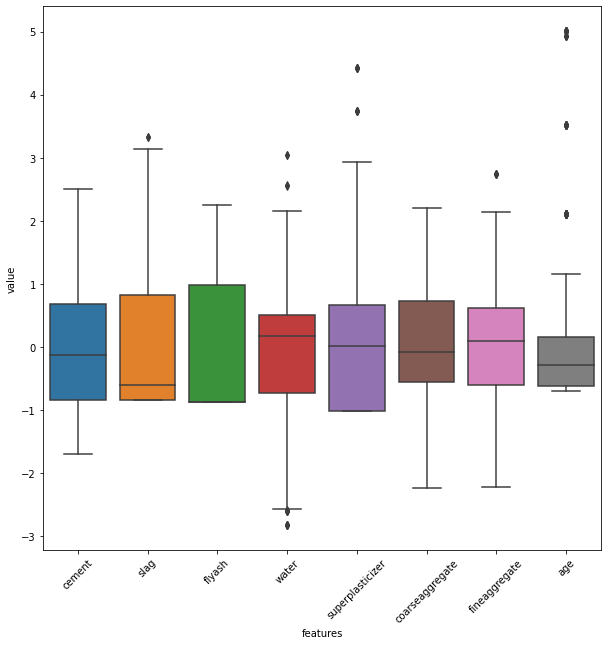

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", data=data_vis)
plt.xticks(rotation=45);


#### To visualize individual  features' kernel density and pairwise scatter plots to look for correlation between different features.

<Figure size 1800x1800 with 0 Axes>

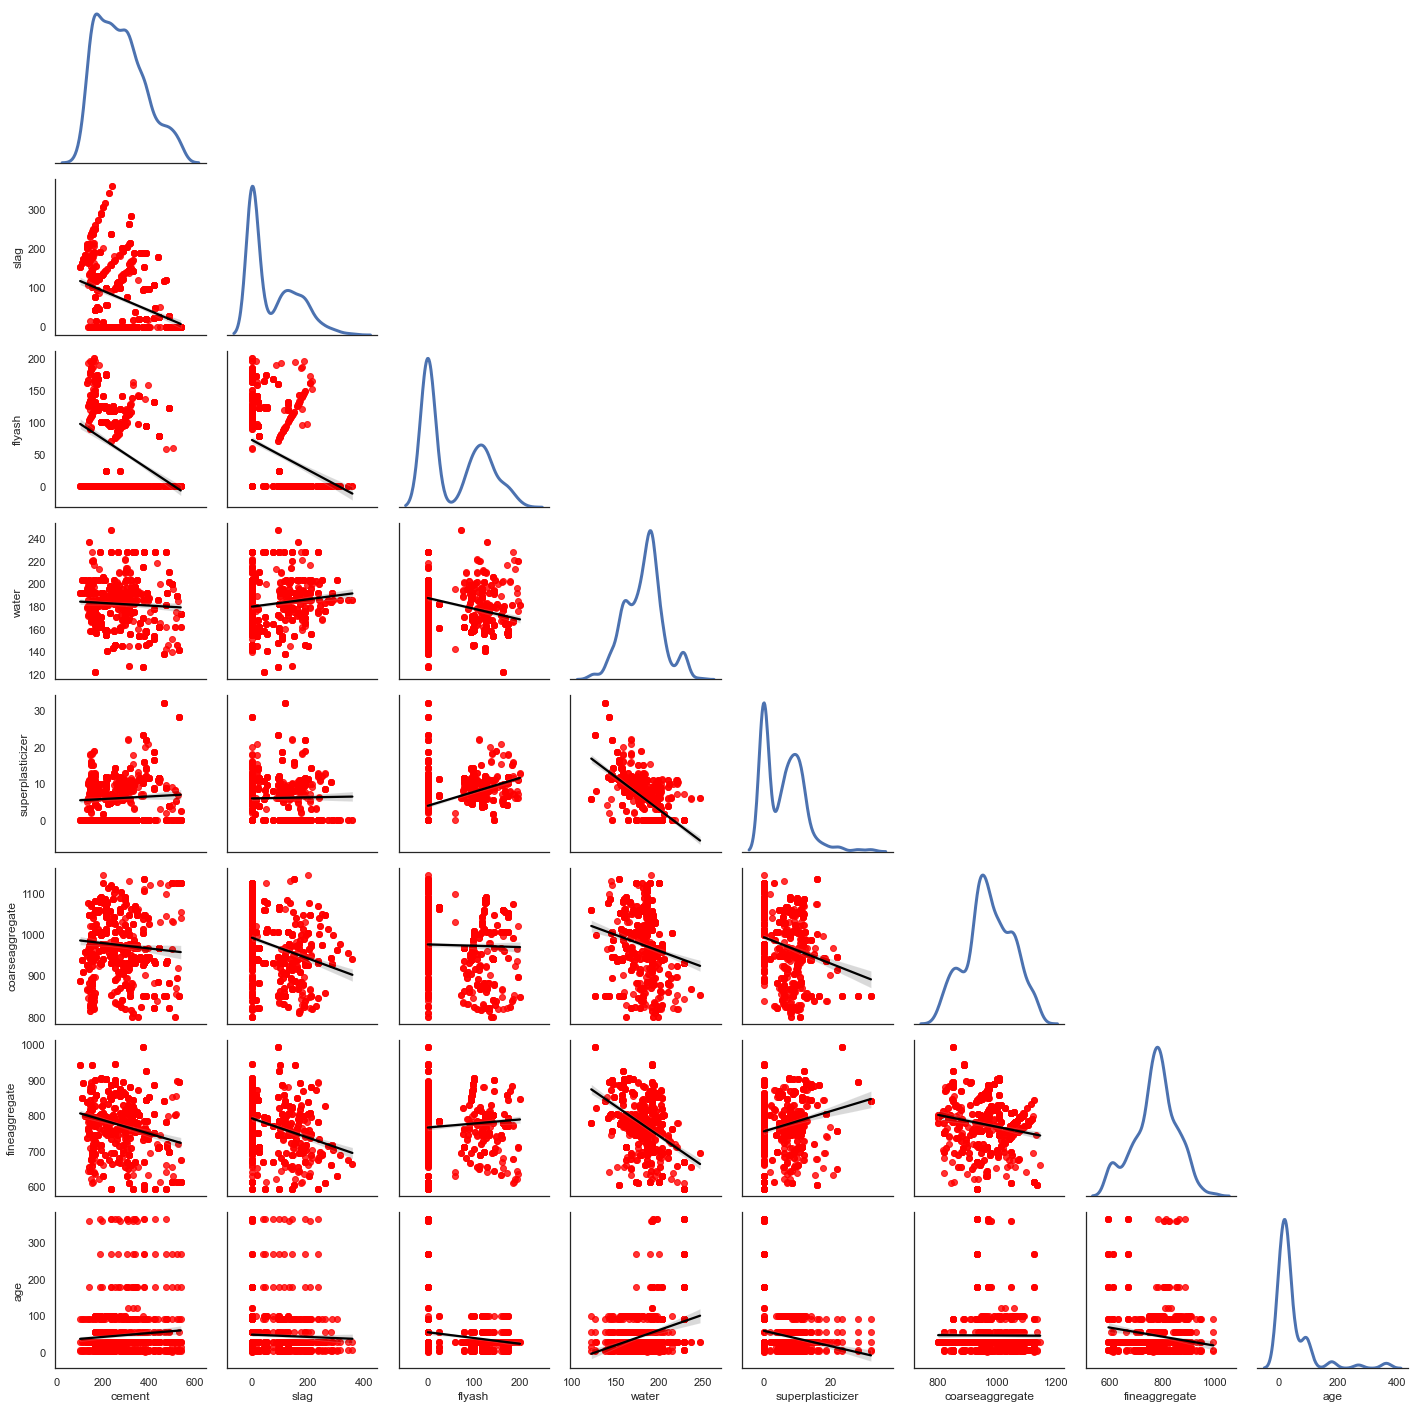

In [16]:
plt.figure(figsize=(25,25))
sns.set(style="white")
df = X.loc[:,['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]
g = sns.PairGrid(df, diag_sharey=False,corner=True);
g.map_lower(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "black"});
g.map_diag(sns.kdeplot, lw=3);


#### To view how related two features are we plot the heatmap which actually represents the correlation of two features.  Correlation of 1 represents very strong positive correlation and correlation of -1 represents very strong negative correlation.

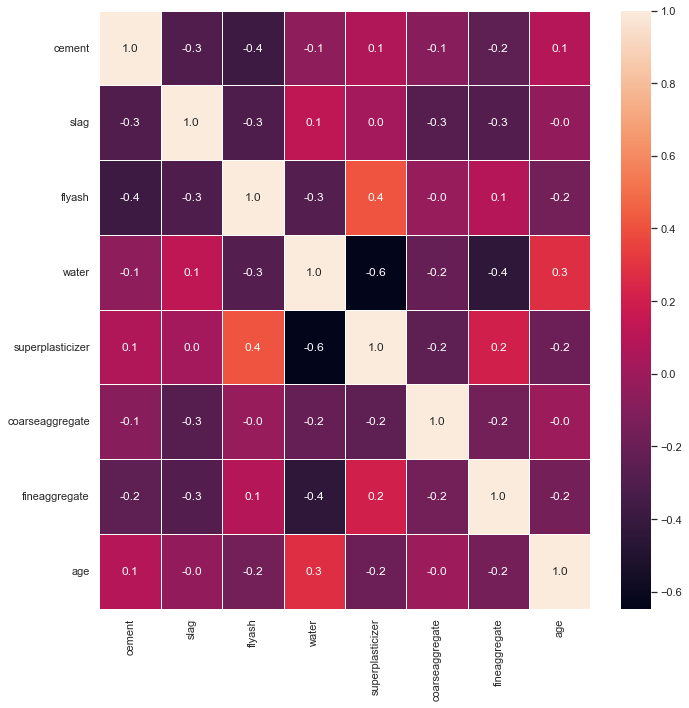

In [17]:
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);


#### Let us individually analyse the feature pair with the highest absolute value of correlation to check if the feature vectors are linearly dependent.

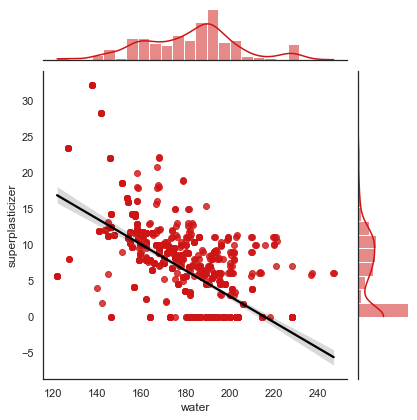

In [18]:
sns.jointplot(x = df.loc[:,'water'],
              y = df.loc[:,'superplasticizer'],
              kind="reg",
              color="#ce1414",line_kws={"color": "black"});


### Training the model

#### Dataframe Data contains the data read from csv

In [19]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
data.shape

(1005, 9)

#### The model is basically a tree containing nodes and edges. There exist two types of nodes in the tree. Leaf nodes and decision nodes. Leaf nodes are the nodes which would be helpful in case of predicting (outputting the final value) while decision nodes will represent set of conditions that would help us to make a decision about the predicted value.

In [21]:
class Node():
    def __init__(self, attribute=None, threshold=None, child_left=None, child_right=None, variance_red=None, level = 0, leaf_value=None):
        
        # data members corresponding to decision nodes
        self.attribute = attribute
        self.threshold = threshold
        self.child_left = child_left
        self.child_right = child_right
        self.variance_red = variance_red
        self.level = level
        
        #data member corresponding to a leaf node
        self.leaf_value = leaf_value

##### Kindly note: We have used the same defination of node for both the types of node. A decision node would have leaf_value = None while a leaf_node would have a numerical leaf_value. This difference would help us to differentiate between a leaf node and a decision node.

#### Class defination of a regression tree which will encapsulate all the functions and operation needed to construct a regression tree

In [22]:
class RegressionTree():
    def __init__(self, minimum_samples=2, max_depth=2): #constructor that will take two parameters
 
        self.root = None
        self.minimum_samples = minimum_samples #min number of samples that should be available for further splitting
        self.max_depth = max_depth #max- depth the tree is allowed to grow
        #these two parameters act as stopping conditions for the tree
        
    def variance_reduction(self, parent, left_branch, right_branch): #to find the reduction in variance
        
        fraction_left = len(left_branch) / len(parent) #fraction of original data in the left branch
        fraction_right = len(right_branch) / len(parent) #fraction of original data in right branch
        reduction_variance = np.var(parent) - (fraction_left * np.var(left_branch) + fraction_right * np.var(right_branch))
        #variance reduction is defined as variance of original data - weighted sum of variance of branches
        return reduction_variance
    
    def split_left_right(self, dataset, index, threshold): #to split the data in two branches depending upon attribute denoted by index and threshold
        
        left_dataset = np.array([x for x in dataset if x[index]<=threshold]) #left dataset contains all datapoints whose value of the specified attribute is less than or equal to threshold
        right_dataset = np.array([x for x in dataset if x[index]>threshold]) #right dataset contains all datapoints whose value of the specified attribute is more than threshold
        return left_dataset, right_dataset #return the two partitions
    
    def cal_leaf_node(self, y):#to calculate the value of a leaf node simple calculate mean of all the datapoints's y value at that node 
        
        leaf_val = np.mean(y)
        return leaf_val
                
    def get_best_feature(self, dataset, number_datapoints, number_attributes): # to get the feature and threshold with maximum variance reduction
        
        #initialise best_feature dictionary
        best_feature = {}
        best_feature["attribute"] = None
        best_feature["threshold"] = 0
        best_feature["dataset_left"] = None
        best_feature["dataset_right"] = None
        best_feature["variance_reduced"] = 0
        
        maximum_variance_reduction = -float("inf") #initialise the maximum variance reduction varaiable which will be sed to keep track of current maximum
        
        for features in range(number_attributes): #iterate over all features
            values = dataset[:, features] #extract the feature column
            unique_sorted_values = np.unique(values) #find sorted and unique values
            #possible threshold would be decided by taking mean of adjacent entries
            threshold_array = np.array([(unique_sorted_values[i]+unique_sorted_values[i+1])/2 for i in range(0,len(unique_sorted_values)-1)])

            for threshold in threshold_array: #iterate over all possible threshold values
                dataset_left, dataset_right = self.split_left_right(dataset, features, threshold) #split the data according to the feature and threshold
                
                if len(dataset_left)>0 and len(dataset_right)>0: #if two partitions are created
                    
                    dataset_y, dataset_left_y, dataset_right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]#extract target variable columns
                    
                    variance_reduced = self.variance_reduction(dataset_y, dataset_left_y, dataset_right_y)#calculate the reduction in variance caused by this split
                    if variance_reduced > maximum_variance_reduction:#if the variance reduction caused is more than the current maxima
                        #update the feature dictionary and store all relevant details
                        best_feature["attribute"] = features
                        best_feature["threshold"] = threshold
                        best_feature["dataset_left"] = dataset_left
                        best_feature["dataset_right"] = dataset_right
                        best_feature["variance_reduced"] = variance_reduced
                        maximum_variance_reduction = variance_reduced # update the current maxima and continue iterating over all possible combinations 
                        
        return best_feature # return the maximum variance reducing feature dictionary
    
    def construct_tree(self, dataset, current_depth=0): #function to construct tree
        
        X, y = dataset[:,:-1], dataset[:,-1] #extract feature matrix and target variable vector from dataset
        number_datapoints, number_attributes = np.shape(X) 
        current_best_feature = {} #to keep a track of the best splitting attribute for current node 
        
        if number_datapoints >= self.minimum_samples:# and current_depth <= self.max_depth: #if the stopping conditions are not yet reached
            current_best_feature = self.get_best_feature(dataset, number_datapoints, number_attributes) #get the best splitting attribute for the node
            if current_best_feature["variance_reduced"]>0: #if the variance reduction is positive that is the data has been splitted in 2 fractions 
                subtree_left = self.construct_tree(current_best_feature["dataset_left"], current_depth+1) #call construct tree recursively for left subtree
                subtree_right = self.construct_tree(current_best_feature["dataset_right"], current_depth+1)#call construct tree recursively for rigjt subtree
                return Node(current_best_feature["attribute"], current_best_feature["threshold"],subtree_left, subtree_right, current_best_feature["variance_reduced"],current_depth)
                #return a node with left subtree as left child and right subtree as right child
        
        #in case the depth is exhausted or we are left with datapoint less than minimum_samples at a node we make that node a leaf node
        leaf_value = self.cal_leaf_node(y)#calculate the laef value 
        return Node(level = current_depth,leaf_value = leaf_value)#return the leaf node
    
    def construct_tree_depth(self, dataset, current_depth=0,max_depth=20): #function to construct tree
        
        X, y = dataset[:,:-1], dataset[:,-1] #extract feature matrix and target variable vector from dataset
        number_datapoints, number_attributes = np.shape(X) 
        current_best_feature = {} #to keep a track of the best splitting attribute for current node 
        
        if number_datapoints >= self.minimum_samples and current_depth <= self.max_depth: #if the stopping conditions are not yet reached
            current_best_feature = self.get_best_feature(dataset, number_datapoints, number_attributes) #get the best splitting attribute for the node
            if current_best_feature["variance_reduced"]>0: #if the variance reduction is positive that is the data has been splitted in 2 fractions 
                subtree_left = self.construct_tree_depth(current_best_feature["dataset_left"], current_depth+1) #call construct tree recursively for left subtree
                subtree_right = self.construct_tree_depth(current_best_feature["dataset_right"], current_depth+1)#call construct tree recursively for rigjt subtree
                return Node(current_best_feature["attribute"], current_best_feature["threshold"],subtree_left, subtree_right, current_best_feature["variance_reduced"],current_depth)
                #return a node with left subtree as left child and right subtree as right child
        
        #in case the depth is exhausted or we are left with datapoint less than minimum_samples at a node we make that node a leaf node
        leaf_value = self.cal_leaf_node(y)#calculate the laef value 
        return Node(level = current_depth,leaf_value = leaf_value)#return the leaf node
    
    
    def print_decision_tree(self,columns,decision_tree=None,indent=" ",curr = 0,depth=[]):
        
        depth.append(curr)
        if decision_tree.leaf_value is not None: #if decision_tree points to a leaf node simply print the value
            print("Leaf: ",round(decision_tree.leaf_value,3))

        else:#if decision tree points to a decision node
            #print the node splitting details
            print(columns[decision_tree.attribute], "==>", round(decision_tree.threshold,3), "(", round(decision_tree.variance_red,3),")")
            
            #print the left subtree by recursive calling the function and indentation increasing at every depth
            print("%sLeft: " % (indent), end="")
            self.print_decision_tree(columns, decision_tree.child_left, indent+indent,curr+1,depth)
            
            #print the right subtree by recursive calling the function and indentation increasing at every depth
            print("%sRight: " % (indent), end="")
            self.print_decision_tree(columns, decision_tree.child_right, indent+indent,curr+1,depth)
    
    def fit_model(self, X, y): #train a model to fit X and y
        
        dataset = np.concatenate((X, y), axis=1)#concatenate X and y to create the dataset
        self.root = self.construct_tree(dataset)#train the tree and store the final returned node in root
            
    def fit_model_depth(self, X, y): #train a model to fit X and y
        
        dataset = np.concatenate((X, y), axis=1)#concatenate X and y to create the dataset
        self.root = self.construct_tree_depth(dataset)
        
    def predict(self, data, decision_tree=None):#to predict target variable for a datapoint x
        
        #basic algo is to traverse the graph depending upon splitting feature and threshold values

        if decision_tree.leaf_value!=None: #if you have reached a leaf node simply return the value of the leaf
            return decision_tree.leaf_value
        
        attribute_value = data[decision_tree.attribute]#else extract the value at splitting attrribute column in x  
        if attribute_value <= decision_tree.threshold: # check if the value is less than or equal to threshold
            return self.predict(data, decision_tree.child_left)#traverse to the left subtree 
        else:
            return self.predict(data, decision_tree.child_right)#else traverse to the right subtree
        

    def post_pruning(self,root,decision_tree,error,depth,original_dataset):
        X_test = original_dataset[:,:-1]
        y_test = original_dataset[:,-1]
        height = find_height(root)
        if decision_tree.leaf_value is not None:
            return root
        
        if decision_tree.leaf_value is None: #if the node is a decision node
            decision_tree.leaf_value = self.cal_leaf_node(y)#assign the corresponding leaf value
            y_pred = [self.predict(x,root) for x in X_test]#make predictions on the new tree
            
            #base condition
            if (mean_error(y_pred,y_test,X_test.shape[0])) <= min(error):#if the tree is succesful in reducing the error
                error.append(mean_error(y_pred,y_test,X_test.shape[0]))
                changenode(root,decision_tree,None,None,self.cal_leaf_node(y))
                num = num_nodes(root)
                y_pred = [self.predict(x,root) for x in X_test]
                error_pred = mean_error(y_pred,y_test,X.shape[0])
                a = {'num':num,'error':error_pred}
                depth.append(a)
                return root#return the root which now has the particular node converted to leaf node
            
            #recursive defination
            else: 
                
                #in case truncating the branch doesn't help
                decision_tree.leaf_value=None 
            
                leftn = decision_tree.child_left
                rightn = decision_tree.child_right
                
                if decision_tree.child_left.leaf_value is None: 
                    leftn = self.post_pruning(root,decision_tree.child_left,error,depth,original_dataset)
                if decision_tree.child_right.leaf_value is None:
                    rightn = self.post_pruning(root,decision_tree.child_right,error,depth,original_dataset)#prune the right subtree recursively
                    
                
                return root#create a node with the pruned left subtree and pruned right subtree as left child and right child respectively 
    

#### Error function that will help us in pruning

In [23]:
def rec_height(decision_tree,height=[]):
     if decision_tree.leaf_value is not None:
        height.append(decision_tree.level)
        return
     else:
        rec_height(decision_tree.child_left,height)
        rec_height(decision_tree.child_right,height)
        return 

In [24]:
def find_height(decision_tree):
    level = []
    rec_height(decision_tree,level)
    return max(level)

In [25]:
def changenode(root,node, child_left,child_right,leaf_value):
     
    if root == node:
        root.child_left = child_left
        root.child_right = child_right
        root.leaf_value  = leaf_value
        return root
 
    if root.child_left is not None:
        root.child_left = changenode(root.child_left,node, child_left,child_right,leaf_value)
 
    elif root.child_right is not None:
        root.child_right = changenode(root.child_right,node, child_left,child_right,leaf_value)
         
    return root
 

In [26]:
def num_nodes(decision_tree):
    l_nodes = 0
    r_nodes = 0
    if decision_tree.leaf_value is not None:
        return 1
    else:
        l_nodes = num_nodes(decision_tree.child_left)
        r_nodes = num_nodes(decision_tree.child_right)
        return l_nodes+r_nodes+1

In [27]:
def mean_error(y_pred, y_actual, n): # to calculate root mean square error of the predictions
    
    sum=0
    for i in range(n): #iterate over all n datapoints
        sum = sum+(y_pred[i]-y_actual[i])**2 #add to sum the square of the difference between prediction and actual label
    
    sum = sum/n #take mean of the sum
    sum = np.sqrt(sum) #take square root of the error
    return sum

#### To select the maximum efficient data split we randomly split the data in 10 sample with 70-30 split and select the distribution that gives us minimum error.

In [28]:
min_error=float("inf") #initialise the minimum error

for i in range(10): #repeat for 10 splits
    d = data.sample(frac = 1,random_state=42) #returns a randomly jumbles data
    
    div = int(0.7 * d.shape[0])#calculate 70 percent of the number of input datapoints
    d_train, d_test = d.iloc[:div,:], d.iloc[div:,:]#split the data into test and train
    
    d_train_x = d_train.iloc[:,:-1].values#set training data featutre matrix
    d_train_y = d_train.iloc[:,-1].values.reshape(-1,1)#set training data output label
    d_test_x = d_test.iloc[:,:-1].values#set test data feature matrix
    d_test_y = d_test.iloc[:,-1].values.reshape(-1,1)#set test data output label
    
    regress_tree = RegressionTree(minimum_samples=3)#construct a regression tree of depth 30(arbitarily large to allow best tree depending upon training set)
    regress_tree.fit_model(d_train_x,d_train_y)
    y_pred_train = [regress_tree.predict(x,regress_tree.root)  for x in d_train_x]#construct the predicted output variable vector
    
    if mean_error(y_pred_train,d_train_y,d_train_x.shape[0])<min_error: #if the error of this tree is less than the current minima
        min_error = mean_error(y_pred_train,d_train_y,d_train_x.shape[0]) #update current minima
        dataset_train = d_train#save the current training dataset
        dataset_test = d_test#save the current test set
        

In [29]:
columns = data.iloc[:,:-1].columns #extract the columns of the training data
columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
      dtype='object')

In [30]:
data_train_x = dataset_train.iloc[:,:-1].values #extract training data feature matrix after best splitting found
data_train_y = dataset_train.iloc[:,-1].values.reshape(-1,1) #extract training data target label vector after best splitting found
data_test_x = dataset_test.iloc[:,:-1].values #extract test data feature matrix after best splitting found
data_test_y = dataset_test.iloc[:,-1].values.reshape(-1,1) #extract test data target label vector after best splitting found

In [31]:
train = [] #to store training errors
test = [] #to store test error

for i in range(1,21):
    regress_tree = RegressionTree(minimum_samples=3, max_depth=i)
    regress_tree.fit_model_depth(data_train_x,data_train_y)#train a tree of heights 1 to 30
    
    y_pred_train = [regress_tree.predict(x,regress_tree.root) for x in data_train_x] #calculate training error
    train.append(mean_error(y_pred_train,data_train_y,data_train_x.shape[0]))
    
    y_pred_test = [regress_tree.predict(x,regress_tree.root) for x in data_test_x] #calculate test error
    test.append(mean_error(y_pred_test,data_test_y,data_test_x.shape[0]))

    


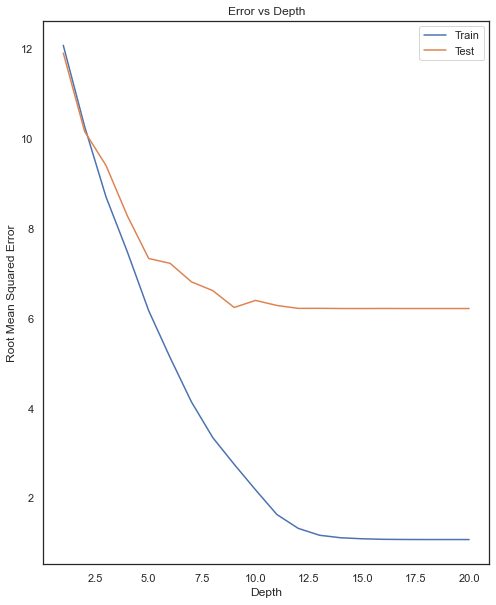

In [32]:
fig = plt.figure(figsize = (8,10))
x = [i for i in range(1,21)] # plot how test and training error vary with depth of the tree
plt.plot(x,train);
plt.plot(x,test);
plt.xlabel("Depth");
plt.ylabel("Root Mean Squared Error");
plt.title("Error vs Depth");
plt.legend(['Train','Test']);


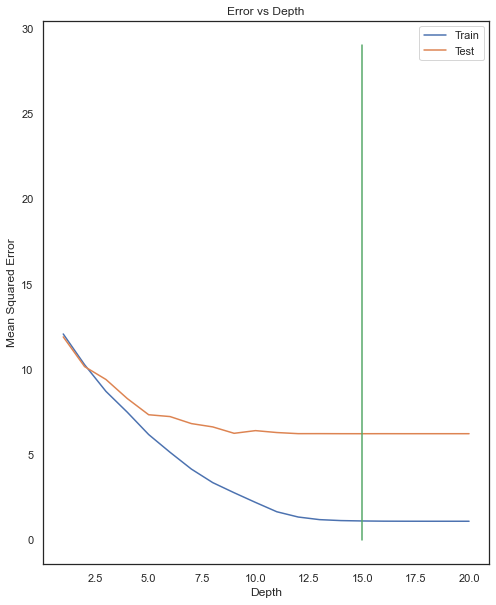

In [33]:
fig = plt.figure(figsize = (8,10))
x = [i for i in range(1,21)] # plot how test and training error vary with depth of the tree
plt.plot(x,train);
plt.plot(x,test);
plt.plot(np.full((30,1),15),np.arange(0,30))
plt.xlabel("Depth");
plt.ylabel("Mean Squared Error");
plt.title("Error vs Depth");
plt.legend(['Train','Test']);


#### We can clearly see the optimal depth of the tree should be around 15 but our present tree has depth 30 which leads to overfitting. The train error has reduced significantly but the tree fails to generalize well on unseen data. Thus, Post-pruning is required.

In [80]:
def num_nodes(decision_tree):
    l_nodes = 0
    r_nodes = 0
    if decision_tree.leaf_value is not None:
        return 1
    else:
        l_nodes = num_nodes(decision_tree.child_left)
        r_nodes = num_nodes(decision_tree.child_right)
        return l_nodes+r_nodes+1

In [81]:
regress_tree = RegressionTree(minimum_samples=3)
regress_tree.fit_model(data_train_x,data_train_y)#train a tree of heights 30
        
y_original = [regress_tree.predict(x,regress_tree.root) for x in data_test_x] #calculate test error
err = mean_error(y_original,data_test_y,data_test_x.shape[0])


In [113]:
import sys

print('The Regression Decision Graph is now available in decision_tree.txt')

original_stdout = sys.stdout #original standard output

with open('decision_tree.txt', 'w') as f:
    sys.stdout = f # standard output to the file
    printtree(regress_tree.root)
    sys.stdout = original_stdout # Reset the standard output

The Regression Decision Graph is now available in decision_tree.txt


In [82]:
tree = regress_tree.root
X = dataset_test.iloc[:,:-1].values
y = dataset_test.iloc[:,-1].values.reshape(-1,1)
dataset = np.concatenate((X, y), axis=1)

d=[]
err=[err]
pruned = regress_tree.post_pruning(regress_tree.root,tree,err,d,dataset)


print("Error before pruning: ",mean_error(y_original,data_test_y,data_test_x.shape[0]))

y_pred_test = [regress_tree.predict(data = x,decision_tree=pruned) for x in data_test_x] 

print("Error after pruning: ",mean_error(y_pred_test,data_test_y,data_test_x.shape[0]))

Error before pruning:  [6.21118875]
Error after pruning:  [5.76859591]


In [83]:
depth=[]
regress_tree.print_decision_tree(columns,pruned," ",0,depth = depth)

age ==> 21.0 ( 68.325 )
 Left: superplasticizer ==> 8.35 ( 53.063 )
  Left: cement ==> 389.0 ( 27.776 )
    Left: age ==> 5.0 ( 11.956 )
        Left: cement ==> 155.0 ( 5.96 )
                Left: coarseaggregate ==> 1009.4 ( 1.703 )
                                Left: cement ==> 112.15 ( 0.818 )
                                                                Left: Leaf:  3.45
                                                                Right: cement ==> 128.65 ( 0.483 )
                                                                                                                                Left: Leaf:  6.28
                                                                                                                                Right: Leaf:  4.805
                                Right: Leaf:  8.06
                Right: coarseaggregate ==> 1000.75 ( 1.837 )
                                Left: superplasticizer ==> 5.05 ( 2.905 )
                                     

In [84]:
depth_pruned = max(depth)
depth_pruned

19

In [85]:
d

[{'num': 921, 'error': 6.211188746584292},
 {'num': 919, 'error': 6.211188746584292},
 {'num': 917, 'error': 6.211188746584292},
 {'num': 915, 'error': 6.211188746584292},
 {'num': 913, 'error': 6.211188746584292},
 {'num': 911, 'error': 6.211188746584292},
 {'num': 907, 'error': 6.211188746584292},
 {'num': 901, 'error': 6.155072279805497},
 {'num': 895, 'error': 6.146955694713363},
 {'num': 877, 'error': 6.143763344326342},
 {'num': 873, 'error': 6.130839362837976},
 {'num': 859, 'error': 6.06925541923678},
 {'num': 855, 'error': 6.06925541923678},
 {'num': 853, 'error': 6.06925541923678},
 {'num': 843, 'error': 6.06925541923678},
 {'num': 835, 'error': 6.06925541923678},
 {'num': 831, 'error': 6.06925541923678},
 {'num': 829, 'error': 6.06925541923678},
 {'num': 825, 'error': 6.06925541923678},
 {'num': 815, 'error': 6.055495214000757},
 {'num': 813, 'error': 6.053472897433629},
 {'num': 811, 'error': 6.053472897433629},
 {'num': 809, 'error': 6.053472897433629},
 {'num': 757, 'erro

In [86]:
#plt.savefig('filename.jpg',bbox_inches='tight', dpi=300)

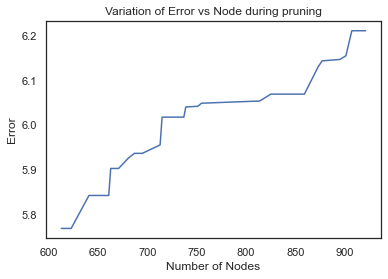

In [120]:
nodes=[d[0]['num']] 
err=[d[0]['error']]
for x in d[1:]:
    num,error = x["num"],x["error"]
   
    nodes.append(num)
    err.append(error)
plt.plot(nodes,err);
plt.xlabel("Number of Nodes");
plt.ylabel("Error");
plt.title("Variation of Error vs Node during pruning");
plt.savefig('depth vs error_pruning.jpg',bbox_inches='tight', dpi=300)

In [117]:
def printtree(root):
    h = find_height(root)
    for i in range(1, h + 1):
        printlevel(root, i)
        print("\n")
 
 
def printlevel(root, level):
    if root is None:
        return root
    
    if level == 1:
        if root.leaf_value is not None:
            print("Leaf{",round(root.leaf_value,3),"}",end = '  ')
        else:
            print(columns[root.attribute][:3],'{',round(root.threshold,3),'}',end='  ')
    elif level > 1:
        printlevel(root.child_left, level - 1)
        printlevel(root.child_right, level - 1)

In [109]:
def bfs_operation(root):
    queue = [root]
    while queue != []:
        popped = queue.pop(0)
        if popped.child_left is not None:
            queue.append(popped.child_left)
        if popped.child_right is not None:
            queue.append(popped.child_right)
        if popped.leaf_value is not None:
            print(popped.leaf_value)
        print(columns[popped.attribute])
        
        print("\n")

In [118]:
import sys

print('The Pruned Graph is now available in pruned.txt')

original_stdout = sys.stdout #original standard output

with open('pruned.txt', 'w') as f:
    sys.stdout = f # standard output to the file
    printtree(pruned)
    sys.stdout = original_stdout # Reset the standard output

The Pruned Graph is now available in pruned.txt


In [119]:
printtree(pruned)

age { 21.0 }  

sup { 8.35 }  cem { 357.45 }  

cem { 389.0 }  age { 5.0 }  cem { 164.6 }  wat { 183.05 }  

age { 5.0 }  wat { 179.35 }  fly { 86.5 }  fly { 94.8 }  sla { 116.1 }  sup { 5.85 }  age { 42.0 }  sup { 3.45 }  

cem { 155.0 }  sup { 2.9 }  Leaf{ 55.135 }  age { 2.0 }  Leaf{ 34.67 }  cem { 216.55 }  cem { 388.45 }  cem { 213.05 }  sla { 58.5 }  sla { 185.35 }  fin { 721.05 }  sla { 158.25 }  sup { 11.5 }  fin { 869.6 }  age { 73.0 }  coa { 966.6 }  

coa { 1009.4 }  coa { 1000.75 }  cem { 296.5 }  cem { 176.9 }  Leaf{ 12.64 }  wat { 219.0 }  sup { 16.2 }  sla { 118.0 }  cem { 213.15 }  sla { 9.5 }  Leaf{ 34.67 }  sla { 111.75 }  fly { 124.75 }  cem { 252.05 }  wat { 182.7 }  age { 59.0 }  fly { 119.0 }  age { 59.0 }  age { 59.0 }  coa { 1076.2 }  wat { 161.3 }  cem { 221.0 }  coa { 811.5 }  sla { 101.7 }  sla { 170.1 }  sla { 101.7 }  cem { 477.5 }  fin { 603.5 }  cem { 465.0 }  Leaf{ 39.06 }  

cem { 112.15 }  Leaf{ 8.06 }  sup { 5.05 }  sup { 8.15 }  fin { 721.05 }  fin {